In [2]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train.csv


In [3]:
import pandas as pd
df = pd.read_csv("Train.csv", low_memory = False, parse_dates=["saledate"])
R, C = df.shape
print("data rows : {}, columns: {}".format(R, C))
df.head().T

data rows : 401125, columns: 53


,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [4]:
# List out columns with their type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              380989 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  142765 non-null  float64       
 8   UsageBand                 69639 non-null   object        
 9   saledate                  401125 non-null  datetime64[ns]
 10  fiModelDesc               401125 non-null  object        
 11  fiBaseModel               401125 non-null  object        
 12  fi

In [5]:
# Create a single view of null value count and percentage by column
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

null_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages
})

display(null_info)

,Null Count,Null Percentage
SalesID,0,0.000000
SalePrice,0,0.000000
MachineID,0,0.000000
ModelID,0,0.000000
datasource,0,0.000000
auctioneerID,20136,5.019882
YearMade,0,0.000000
MachineHoursCurrentMeter,258360,64.408850
UsageBand,331486,82.639078
saledate,0,0.000000


In [6]:
df[df.duplicated()] # check duplicated rows

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls


In [7]:
# statistics for categorical columns
df.describe(include='object')

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
count,69639,401125,401125,263934,56908,71919,190350,401125,401125,401125,...,99872,99218,99288,99218,99153,78672,79833,79834,69411,69369
unique,3,4999,1950,175,122,139,6,74,53,6,...,19,29,3,3,3,2,10,7,4,5
top,Medium,310G,580,C,II,L,Medium,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Florida,TEX,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional
freq,33985,5039,19798,43235,13202,15875,62274,56166,63944,101167,...,79651,78820,83093,90255,84653,78652,38612,69923,68073,68679


In [8]:
# statistics for numerical columns
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saledate
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05,401125
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03,2004-08-02 07:47:13.986413184
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,1989-01-17 00:00:00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00,2000-10-07 00:00:00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00,2006-03-23 00:00:00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03,2009-03-24 00:00:00
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06,2011-12-30 00:00:00
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04,NaN


In [9]:
# Target variable analysis = SalePrice
df["SalePrice"].describe()


,SalePrice
count,401125.000000
mean,31099.712848
std,23036.898502
min,4750.000000
25%,14500.000000
50%,24000.000000
75%,40000.000000
max,142000.000000


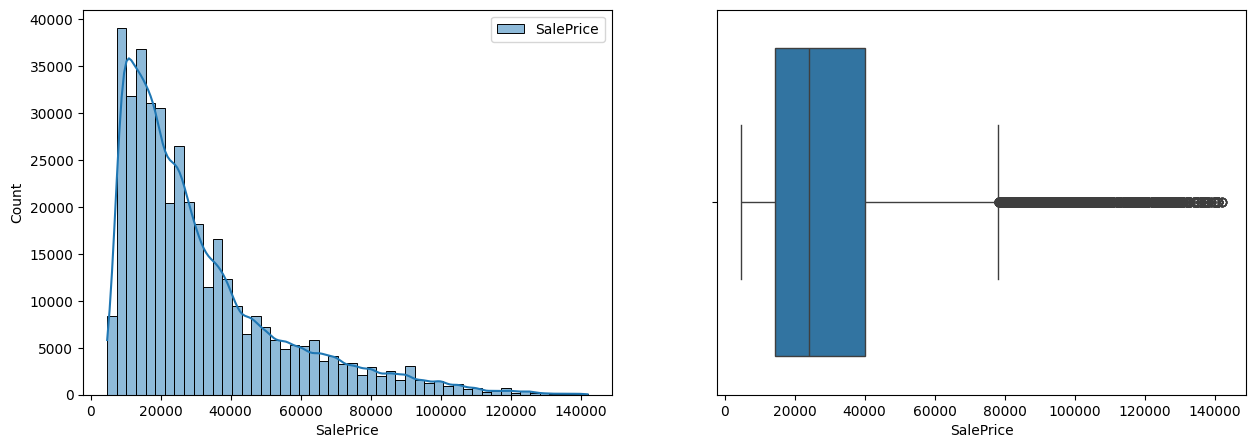

In [10]:
# Lets see SalePrice distribution
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(df.SalePrice, label="SalePrice", bins=50, ax=ax0, kde=True)
ax0.legend()
sns.boxplot(x=df.SalePrice, ax=ax1)
plt.show()

The high positive skewness of the SalePrice distribution suggests that most properties were sold at prices below the mean sale price, as reflected in the corresponding box plot.

Moving forward to look into correlation of the features - this will help us identify impact of certain feaatures on our target variable.

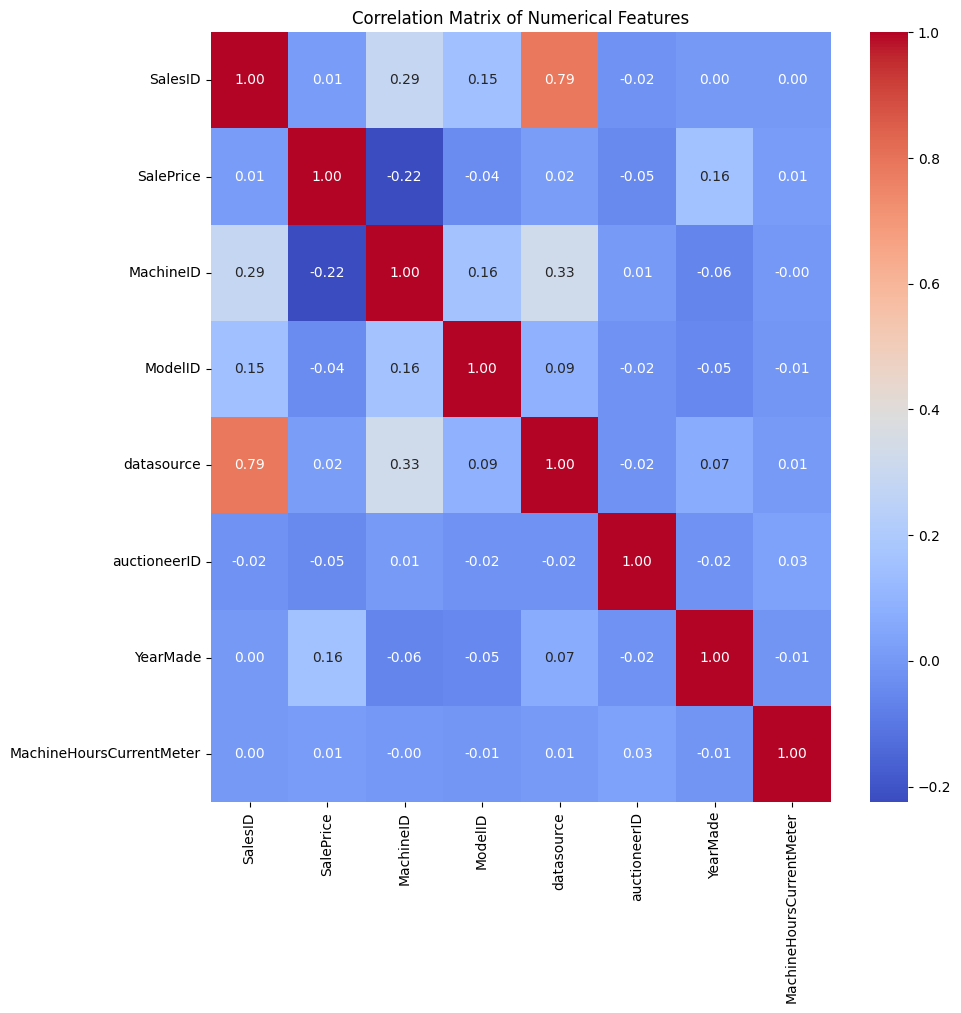

In [11]:
# Ploting feature correlation matrix (only numerical features)
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

We can see that YearMade and MachineId are two features that have highest correlation with SalePrice. They should be investigated further.

YearMade represents the registered manufacturing year of each auctioned machine. Let's examine how sales counts and average sale prices are distributed across different manufacturing years.

/tmp/ipython-input-2733576496.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="YearMade",
/tmp/ipython-input-2733576496.py:4: UserWarning: 
The palette list has fewer values (6) than needed (72) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x="YearMade",
/tmp/ipython-input-2733576496.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="YearMade",
/tmp/ipython-input-2733576496.py:11: UserWarning: 
The palette list has fewer values (6) than needed (72) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="YearMade",


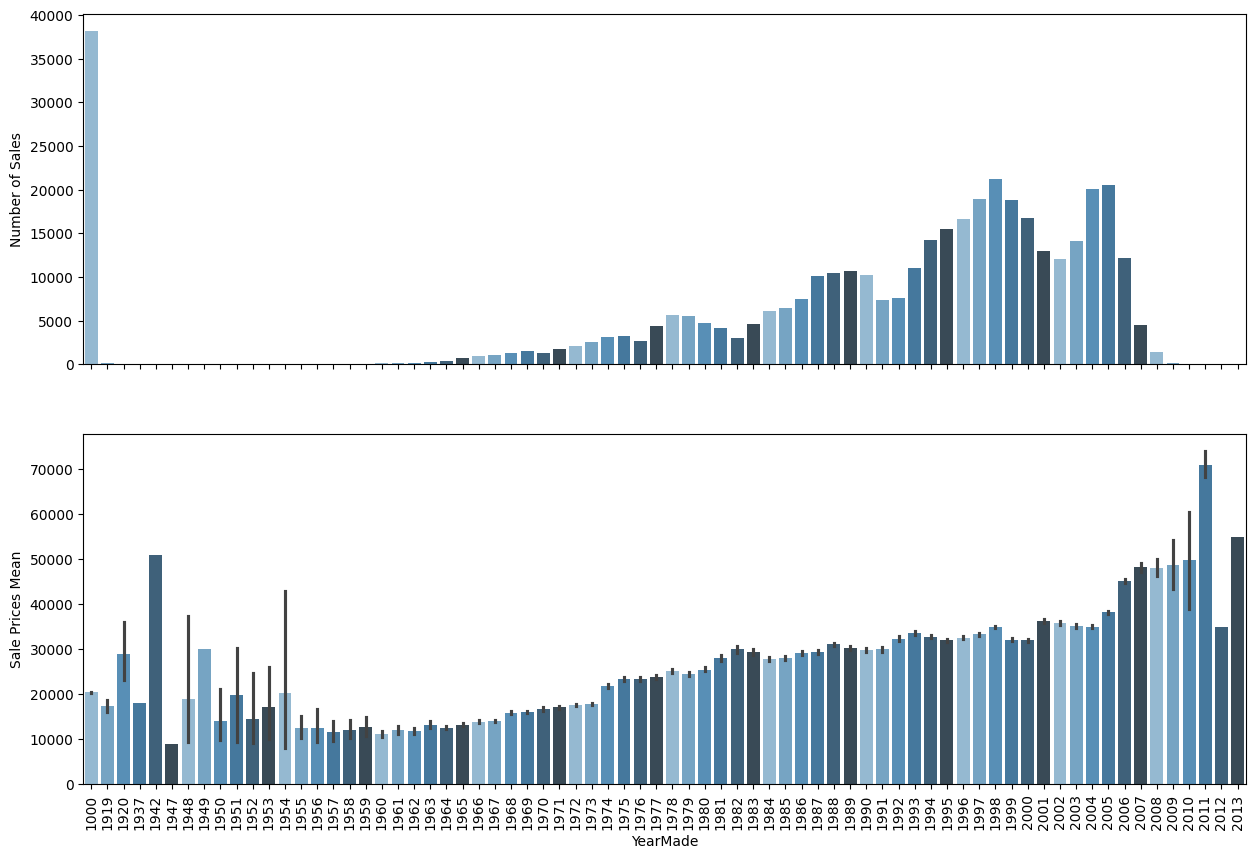

In [12]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 10))

# Plotting the sell count for each year
sns.countplot(x="YearMade",
              data=df,
              palette=sns.color_palette("Blues_d"),
              ax=ax0)
ax0.set_ylabel("Number of Sales")

# Plotting the mean price for each year
sns.barplot(x="YearMade",
            y="SalePrice",
            data=df,
            palette=sns.color_palette("Blues_d"),
            ax=ax1)
ax1.set_ylabel("Sale Prices Mean")

plt.xticks(rotation=90)
plt.show()

The year 1000 shows a high concentration of manufactured machines, which may be due to data collection errors or serve as a placeholder for unregistered years; therefore, it will be left as is. Apart from this, the first plot reveals that most auctioned machines were manufactured around 1998 and 2005, with relatively few machines made after 2008. The distribution of sale prices by manufacturing year follows the expected trend: newer machines generally command higher prices than older ones, with some exceptions.

MachineID
This feature serves as an identifier for each specific machine. Since machines can be sold multiple times, it is expected that some MachineID values will appear in more than one entry. To confirm, we will check for unique MachineID values.

In [13]:
# Print the rate of unique values for MachineID
unique_machine_ids = df['MachineID'].nunique()
total_machine_ids = len(df)
unique_rate = unique_machine_ids / total_machine_ids
print(f"Number of unique MachineIDs: {unique_machine_ids}")
print(f"Rate of unique MachineID values: {unique_rate:.4f}")

Number of unique MachineIDs: 341027
Rate of unique MachineID values: 0.8502


MachineID exhibits high cardinality, making it unlikely that its distribution alone will reveal meaningful patterns. To gain better insights, a scatter plot of SalePrice by MachineID will be created, incorporating the datasource feature—which has significant correlation with MachineID—to enhance the interpretation of the results.

<Axes: xlabel='MachineID', ylabel='SalePrice'>

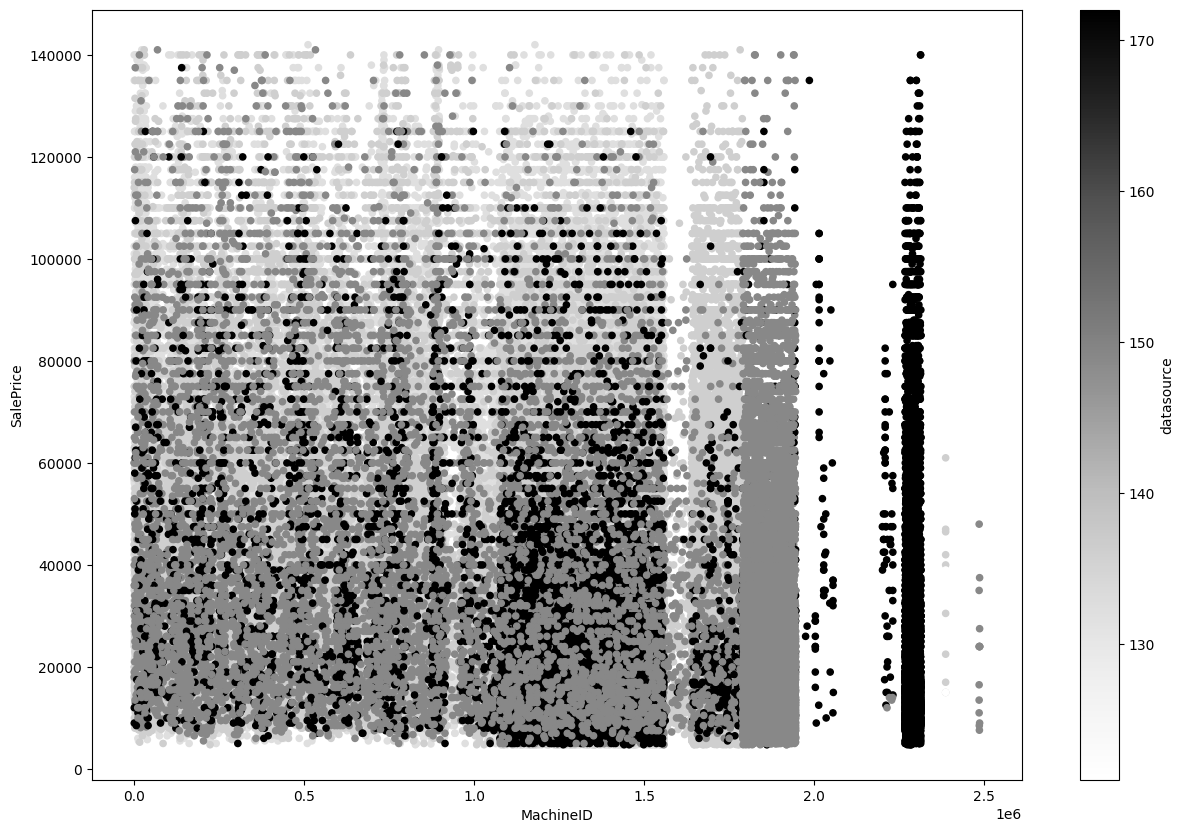

In [14]:
df.plot.scatter(x="MachineID", y="SalePrice", c="datasource", figsize=(15, 10))

Initially, no clear patterns can be inferred from this distribution except that most selling prices cluster in the lower range, reinforcing the earlier observation that many prices fall below the mean. Additionally, certain data sources appear specialized in reporting specific machines.

ANALYZE MISSING VALUES

In [18]:
print("="*80)
print("ANALYZING MISSING VALUES")
print("="*80)

# Display current missing values summary
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

null_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages
}).sort_values('Null Percentage', ascending=False)

print("\nColumns with Missing Values:")
print(null_info[null_info['Null Count'] > 0])

print("\n✓ Analysis complete! ")

ANALYZING MISSING VALUES

Columns with Missing Values:
                          Null Count  Null Percentage
Pushblock                     375906        93.712932
Tip_Control                   375906        93.712932
Enclosure_Type                375906        93.712932
Engine_Horsepower             375906        93.712932
Blade_Extension               375906        93.712932
Blade_Width                   375906        93.712932
Scarifier                     375895        93.710190
Grouser_Tracks                357763        89.189903
Hydraulics_Flow               357763        89.189903
Coupler_System                357667        89.165971
fiModelSeries                 344217        85.812901
Steering_Controls             331756        82.706388
Differential_Type             331714        82.695918
UsageBand                     331486        82.639078
fiModelDescriptor             329206        82.070676
Backhoe_Mounting              322453        80.387161
Stick                      

REMOVE DUPLICATES

In [20]:
# ============================================================================
# CELL 2: REMOVE DUPLICATES
# This removes any duplicate rows from the data
# ============================================================================

print("="*80)
print("REMOVING DUPLICATES")
print("="*80)

# Create a copy to work with
df_processed = df.copy()

# Check and remove duplicates
duplicates_before = df_processed.duplicated().sum()
print(f"\nDuplicate rows found: {duplicates_before}")

if duplicates_before > 0:
    df_processed = df_processed.drop_duplicates()
    duplicates_after = df_processed.duplicated().sum()
    print(f"✓ Duplicates removed: {duplicates_before}")
    print(f"✓ Remaining duplicates: {duplicates_after}")
    print(f"✓ New shape: {df_processed.shape}")
else:
    print("✓ No duplicate rows found - data is clean!")

print("\n✓ Duplicate check complete! ")

REMOVING DUPLICATES

Duplicate rows found: 0
✓ No duplicate rows found - data is clean!

✓ Duplicate check complete! 


HANDLE MISSING VALUES

In [21]:
# ============================================================================
# CELL 3: HANDLE MISSING VALUES
# This fixes all the null/missing values in the data
# ============================================================================

print("="*80)
print("HANDLING MISSING VALUES")
print("="*80)

# Strategy 1: Drop columns with >70% missing values
threshold = 70
cols_to_drop = null_info[null_info['Null Percentage'] > threshold].index.tolist()
if cols_to_drop:
    print(f"\nDropping columns with >{threshold}% missing values:")
    print(cols_to_drop)
    df_processed = df_processed.drop(columns=cols_to_drop)
else:
    print(f"\nNo columns with >{threshold}% missing values found.")

# Strategy 2: Handle numerical columns
print("\n--- Handling Numerical Columns ---")
numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col != 'SalePrice']

for col in numerical_cols:
    if df_processed[col].isnull().sum() > 0:
        median_val = df_processed[col].median()
        df_processed[col].fillna(median_val, inplace=True)
        print(f"  {col}: Filled with median = {median_val:.2f}")

# Strategy 3: Handle categorical columns
print("\n--- Handling Categorical Columns ---")
categorical_cols = df_processed.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if df_processed[col].isnull().sum() > 0:
        df_processed[col].fillna('Unknown', inplace=True)
        print(f"  {col}: Filled with 'Unknown'")

# Strategy 4: Handle YearMade = 1000
print("\n--- Handling YearMade = 1000 ---")
if 'YearMade' in df_processed.columns:
    year_1000_count = (df_processed['YearMade'] == 1000).sum()
    print(f"Records with YearMade = 1000: {year_1000_count}")

    valid_years = df_processed[df_processed['YearMade'] != 1000]['YearMade']
    median_year = valid_years.median()
    df_processed.loc[df_processed['YearMade'] == 1000, 'YearMade'] = median_year
    print(f"Replaced with median year: {median_year:.0f}")

# Verify
print("\n--- Verification ---")
remaining_nulls = df_processed.isnull().sum().sum()
print(f"Total remaining null values: {remaining_nulls}")

print("\n✓ Missing values handled!.")




HANDLING MISSING VALUES

Dropping columns with >70% missing values:
['Pushblock', 'Tip_Control', 'Enclosure_Type', 'Engine_Horsepower', 'Blade_Extension', 'Blade_Width', 'Scarifier', 'Grouser_Tracks', 'Hydraulics_Flow', 'Coupler_System', 'fiModelSeries', 'Steering_Controls', 'Differential_Type', 'UsageBand', 'fiModelDescriptor', 'Backhoe_Mounting', 'Stick', 'Pad_Type', 'Turbocharged', 'Blade_Type', 'Travel_Controls', 'Tire_Size', 'Grouser_Type', 'Track_Type', 'Stick_Length', 'Pattern_Changer', 'Thumb', 'Undercarriage_Pad_Width', 'Ripper', 'Drive_System']

--- Handling Numerical Columns ---
  auctioneerID: Filled with median = 2.00
  MachineHoursCurrentMeter: Filled with median = 0.00

--- Handling Categorical Columns ---


/tmp/ipython-input-809183181.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(median_val, inplace=True)
/tmp/ipython-input-809183181.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

  fiSecondaryDesc: Filled with 'Unknown'
  ProductSize: Filled with 'Unknown'
  Enclosure: Filled with 'Unknown'
  Forks: Filled with 'Unknown'
  Ride_Control: Filled with 'Unknown'
  Transmission: Filled with 'Unknown'
  Hydraulics: Filled with 'Unknown'
  Coupler: Filled with 'Unknown'

--- Handling YearMade = 1000 ---
Records with YearMade = 1000: 38185
Replaced with median year: 1996

--- Verification ---
Total remaining null values: 0

✓ Missing values handled!.


ADD EXTRA COLUMNS

In [22]:
print("="*80)
print("ADDING EXTRA COLUMNS")
print("="*80)

# Column 1: MachineAge
if 'YearMade' in df_processed.columns:
    current_year = 2012
    df_processed['MachineAge'] = current_year - df_processed['YearMade']
    print(f"✓ Added 'MachineAge' column")
    print(f"  Range: {df_processed['MachineAge'].min()} to {df_processed['MachineAge'].max()} years")

# Column 2: Sale Year
if 'saledate' in df_processed.columns:
    df_processed['SaleYear'] = df_processed['saledate'].dt.year
    print(f"✓ Added 'SaleYear' column")

# Column 3: Sale Month
if 'saledate' in df_processed.columns:
    df_processed['SaleMonth'] = df_processed['saledate'].dt.month
    print(f"✓ Added 'SaleMonth' column")

# Column 4: Sale Day of Week
if 'saledate' in df_processed.columns:
    df_processed['SaleDayOfWeek'] = df_processed['saledate'].dt.dayofweek
    print(f"✓ Added 'SaleDayOfWeek' column (0=Monday, 6=Sunday)")

# Column 5: Sale Quarter
if 'saledate' in df_processed.columns:
    df_processed['SaleQuarter'] = df_processed['saledate'].dt.quarter
    print(f"✓ Added 'SaleQuarter' column")

# Column 6: Machine Resale Count
if 'MachineID' in df_processed.columns:
    machine_resale_counts = df_processed['MachineID'].value_counts()
    df_processed['MachineResaleCount'] = df_processed['MachineID'].map(machine_resale_counts)
    print(f"✓ Added 'MachineResaleCount' column")

# Column 7: Price per Age
if 'SalePrice' in df_processed.columns and 'MachineAge' in df_processed.columns:
    df_processed['PricePerAge'] = df_processed['SalePrice'] / (df_processed['MachineAge'] + 1)
    print(f"✓ Added 'PricePerAge' column")

# Column 8: Is Very Old flag
if 'MachineAge' in df_processed.columns:
    df_processed['IsVeryOld'] = (df_processed['MachineAge'] > 30).astype(int)
    print(f"✓ Added 'IsVeryOld' flag")
    print(f"  Very old machines: {df_processed['IsVeryOld'].sum()}")

print(f"\n✓ Total new columns added: 8")

ADDING EXTRA COLUMNS
✓ Added 'MachineAge' column
  Range: -1 to 93 years
✓ Added 'SaleYear' column
✓ Added 'SaleMonth' column
✓ Added 'SaleDayOfWeek' column (0=Monday, 6=Sunday)
✓ Added 'SaleQuarter' column
✓ Added 'MachineResaleCount' column
✓ Added 'PricePerAge' column
✓ Added 'IsVeryOld' flag
  Very old machines: 47746

✓ Total new columns added: 8


SUMMARY AND VISUALIZATIONS



SUMMARY

Original shape: (401125, 53)
Processed shape: (401125, 31)
Columns dropped: 30

--- New Columns Created ---
1. MachineAge
2. SaleYear
3. SaleMonth
4. SaleDayOfWeek
5. SaleQuarter
6. MachineResaleCount
7. PricePerAge
8. IsVeryOld

--- Data Quality Check ---
Total null values: 0
Duplicate rows: 0

--- Sample of Processed Data ---


,MachineAge,SaleYear,SaleMonth,MachineResaleCount,SalePrice
0,8,2006,11,1,66000
1,16,2004,3,1,57000
2,11,2004,2,3,10000
3,11,2011,5,1,38500
4,5,2009,7,1,11000


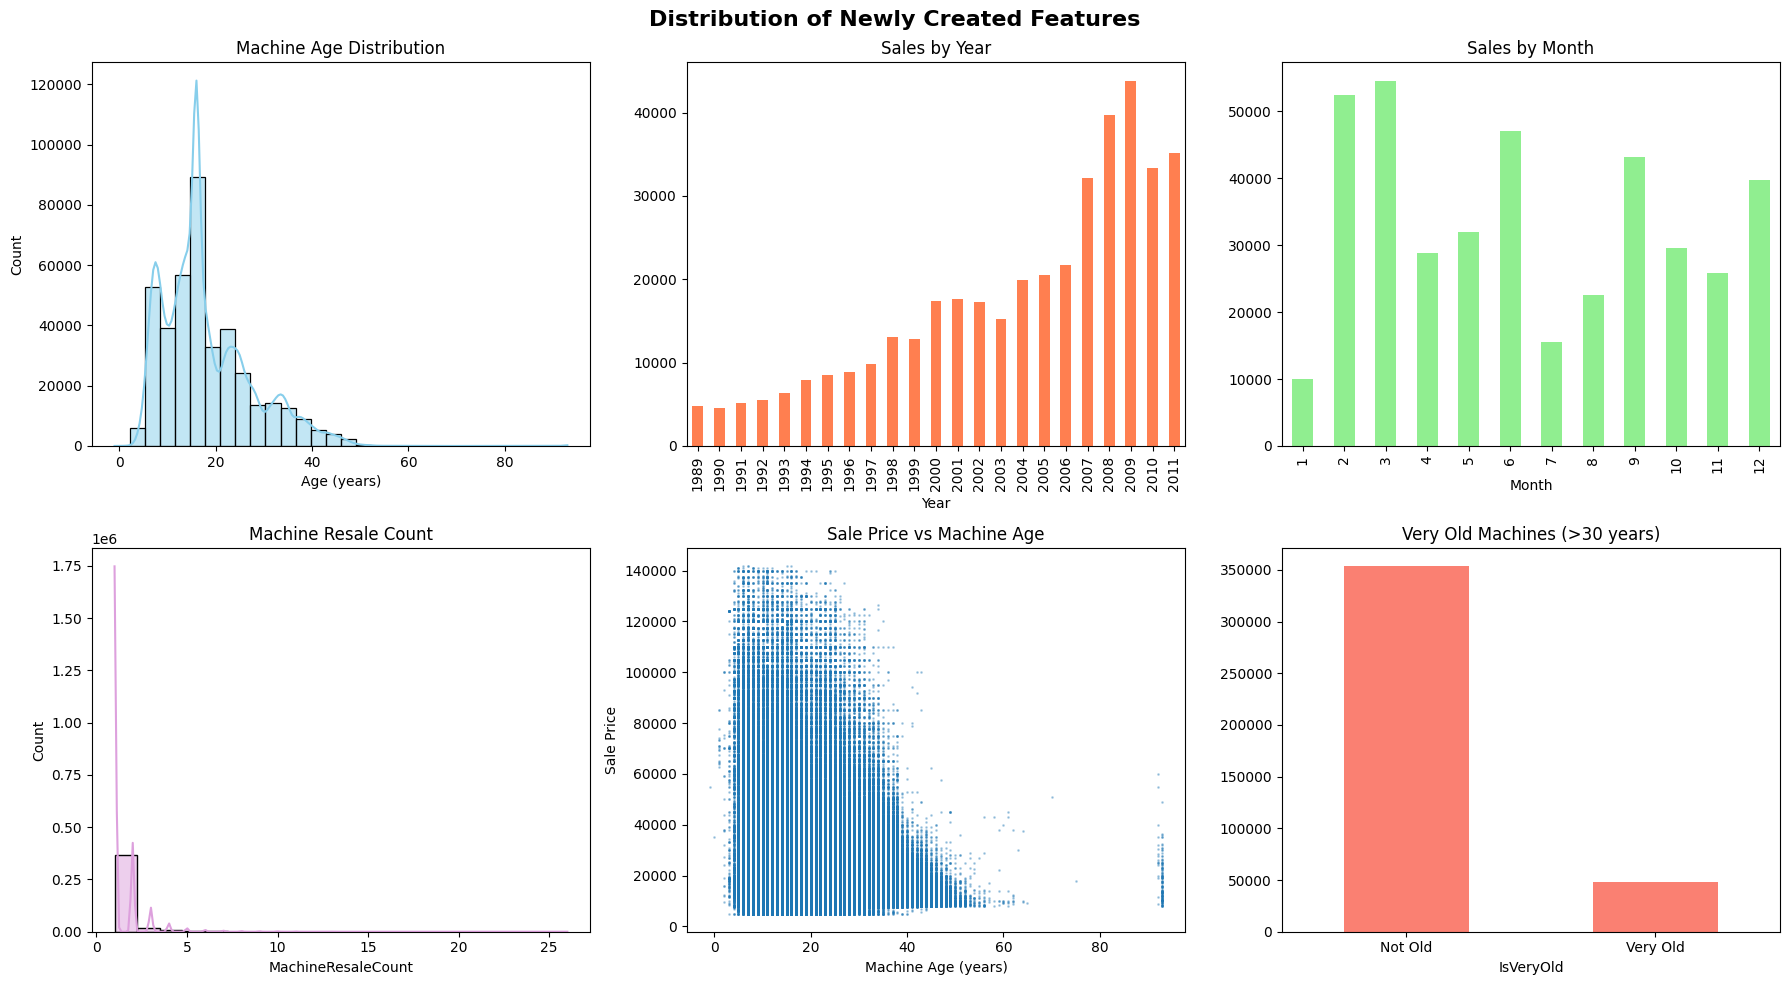


✓ Visualizations complete! 


In [23]:
print("="*80)
print("SUMMARY")
print("="*80)

print(f"\nOriginal shape: {df.shape}")
print(f"Processed shape: {df_processed.shape}")
print(f"Columns dropped: {len(cols_to_drop)}")

print("\n--- New Columns Created ---")
new_columns = ['MachineAge', 'SaleYear', 'SaleMonth', 'SaleDayOfWeek',
               'SaleQuarter', 'MachineResaleCount', 'PricePerAge', 'IsVeryOld']
for i, col in enumerate(new_columns, 1):
    if col in df_processed.columns:
        print(f"{i}. {col}")

print("\n--- Data Quality Check ---")
print(f"Total null values: {df_processed.isnull().sum().sum()}")
print(f"Duplicate rows: {df_processed.duplicated().sum()}")

# Display sample
print("\n--- Sample of Processed Data ---")
display(df_processed[['MachineAge', 'SaleYear', 'SaleMonth', 'MachineResaleCount', 'SalePrice']].head())

# Create visualizations
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Newly Created Features', fontsize=16, fontweight='bold')

# Plot 1: MachineAge
if 'MachineAge' in df_processed.columns:
    sns.histplot(df_processed['MachineAge'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Machine Age Distribution')
    axes[0, 0].set_xlabel('Age (years)')

# Plot 2: SaleYear
if 'SaleYear' in df_processed.columns:
    df_processed['SaleYear'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 1], color='coral')
    axes[0, 1].set_title('Sales by Year')
    axes[0, 1].set_xlabel('Year')

# Plot 3: SaleMonth
if 'SaleMonth' in df_processed.columns:
    df_processed['SaleMonth'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 2], color='lightgreen')
    axes[0, 2].set_title('Sales by Month')
    axes[0, 2].set_xlabel('Month')

# Plot 4: MachineResaleCount
if 'MachineResaleCount' in df_processed.columns:
    sns.histplot(df_processed['MachineResaleCount'], bins=20, kde=True, ax=axes[1, 0], color='plum')
    axes[1, 0].set_title('Machine Resale Count')

# Plot 5: SalePrice vs MachineAge
if 'MachineAge' in df_processed.columns and 'SalePrice' in df_processed.columns:
    axes[1, 1].scatter(df_processed['MachineAge'], df_processed['SalePrice'], alpha=0.3, s=1)
    axes[1, 1].set_title('Sale Price vs Machine Age')
    axes[1, 1].set_xlabel('Machine Age (years)')
    axes[1, 1].set_ylabel('Sale Price')

# Plot 6: IsVeryOld
if 'IsVeryOld' in df_processed.columns:
    df_processed['IsVeryOld'].value_counts().plot(kind='bar', ax=axes[1, 2], color='salmon')
    axes[1, 2].set_title('Very Old Machines (>30 years)')
    axes[1, 2].set_xticklabels(['Not Old', 'Very Old'], rotation=0)

plt.tight_layout()
plt.show()

print("\n✓ Visualizations complete! ")